In [1]:
import pygraphviz as pgv

# Create a new graph
graph = pgv.AGraph(directed=True)

# Add nodes and edges
graph.add_node('A')
graph.add_node('B')
graph.add_edge('A', 'B')

# Print the graph to a file
graph.layout(prog='dot')
graph.draw('output.png')


   Source Destination
0  Page A       API 1
1  Page A       API 2
2  Page B       API 3
3   API 1  Resource 1
4   API 2  Resource 2
5   API 3  Resource 3


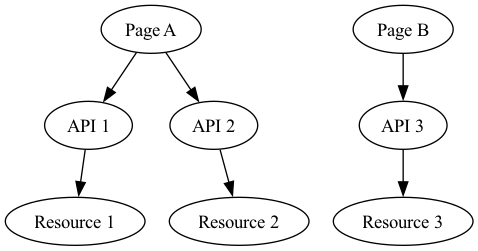

In [2]:
# Import necessary libraries
import pandas as pd
import pygraphviz as pgv
from IPython.display import Image

# Load data into DataFrame
data = {
    'Source': ['Page A', 'Page A', 'Page B', 'API 1', 'API 2', 'API 3'],
    'Destination': ['API 1', 'API 2', 'API 3', 'Resource 1', 'Resource 2', 'Resource 3']
}
df = pd.DataFrame(data)
print(df)

# Function to create graph from DataFrame
def create_graph(df):
    graph = pgv.AGraph(directed=True)

    for index, row in df.iterrows():
        graph.add_node(row['Source'])
        graph.add_node(row['Destination'])
        graph.add_edge(row['Source'], row['Destination'])

    return graph

# Create and render the graph
graph = create_graph(df)
graph.draw('flowchart.png', prog='dot')

# Display the graph in the notebook
Image(filename='flowchart.png')


In [3]:
df = pd.read_json('data.json')

In [4]:
def render_graph(graph, filename='flowchart.png', prog='dot', format='png', size=None):
    """
    Render the graph and save it to an image file.

    Parameters:
    graph (AGraph): Graph object to render.
    filename (str): Output filename for the image.
    prog (str): Layout program for graph rendering (default: 'dot').
    format (str): Output image format (default: 'png').
    size (tuple): Optional tuple (width, height) to set image size in pixels.
    """
    if size:
        graph.graph_attr['size'] = ','.join(map(str, size))
    graph.draw(filename, prog=prog, format=format)

/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.497638 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


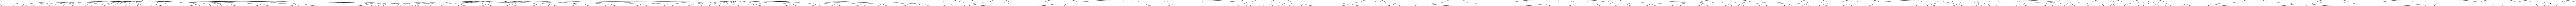

In [5]:
# Function to create graph from DataFrame
def create_graph(df):
    graph = pgv.AGraph(directed=True)

    for index, row in df.iterrows():
        graph.add_node(row['Referer'])
        graph.add_node(row['path'])
        graph.add_edge(row['Referer'], row['path'])

    return graph

# Create and render the graph
graph = create_graph(df)

render_graph(graph, filename='flowchart2.1.png', prog='dot', size=(8000, 1800))


graph.draw('flowchart2.1.png', prog='dot')

# Display the graph in the notebook
Image(filename='flowchart2.1.png')

In [6]:
df['Host'].unique()

array(['api.evernote.com', 'fonts.googleapis.com',
       'web.desktop.evernote.com', 'apis.google.com',
       'logs.browser-intake-datadoghq.com',
       'api.pico.bendingspoonsapps.com', 'templates.svc.www.evernote.com',
       'www.evernote.com', 'o6787.ingest.sentry.io',
       'rte.svc.www.evernote.com', 'www.googletagmanager.com',
       'www.google-analytics.com', 'stats.g.doubleclick.net',
       'www.google.com', 'www.google.co.in', 'bat.bing.com',
       'googleads.g.doubleclick.net', 'cec.svc.evernote.com',
       'help.evernote.com', 'static.zdassets.com', 'cdn.jsdelivr.net',
       'use.fontawesome.com', 'safebrowsing.googleapis.com',
       'www.youtube.com', 'i.ytimg.com', 'cdn.plyr.io',
       'jnn-pa.googleapis.com', 'play.google.com',
       'static.doubleclick.net', 'accounts.evernote.com',
       'evernotesupport.zendesk.com', 'cdn1.evernote.com',
       'detectportal.firefox.com', 'www.gstatic.com'], dtype=object)

In [7]:
df["full_path"] = "https://"+df['Host']+df['path']

In [8]:
df['full_path']

0              https://api.evernote.com/command/v1/batch
1                       https://fonts.googleapis.com/css
2      https://web.desktop.evernote.com/builds/next_2...
3      https://web.desktop.evernote.com/builds/next_2...
4                      https://apis.google.com/js/api.js
                             ...                        
193            https://www.google.co.in/ads/ga-audiences
194        https://www.evernote.com/shard/s633/notestore
195             https://api.evernote.com/sync/v1/connect
196             https://api.evernote.com/sync/v1/connect
197        https://www.evernote.com/DevicePaywall.action
Name: full_path, Length: 198, dtype: object

/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.518728 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


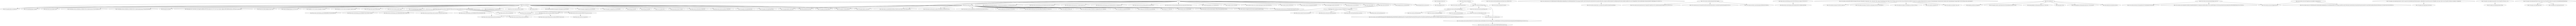

In [9]:
# Function to create graph from DataFrame
def create_graph(df):
    graph = pgv.AGraph(directed=True)

    for index, row in df.iterrows():
        graph.add_node(row['Referer'])
        graph.add_node(row['full_path'])
        graph.add_edge(row['Referer'], row['full_path'])

    return graph

# Create and render the graph
graph = create_graph(df)

render_graph(graph, filename='flowchart2.1.png', prog='dot', size=(8000, 1800))


graph.draw('flowchart2.1.png', prog='dot')

# Display the graph in the notebook
Image(filename='flowchart2.1.png')

/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.518736 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


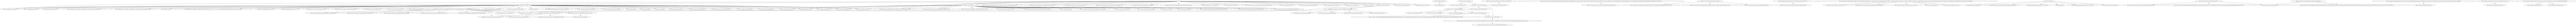

In [10]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'])
        graph.add_node(row['full_path'])
        graph.add_edge(row['Referer'], row['full_path'])

    return graph

def render_graph(graph, filename, prog='dot', size=(8000, 1800)):
    graph.layout(prog=prog)
    graph.draw(filename)
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size
render_graph(graph, filename='flowchart2.1.png', prog='dot', size=(16000, 9000))


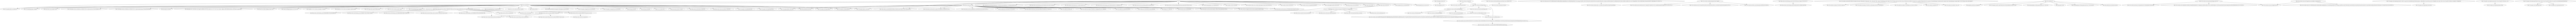

In [11]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'])
        graph.add_node(row['full_path'])
        graph.add_edge(row['Referer'], row['full_path'])

    return graph

def render_graph(graph, filename, prog='dot', size=(2000, 2000)):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}"'.format(','.join(map(str, size))))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size
render_graph(graph, filename='flowchart.png', prog='dot', size=(2000, 2000))


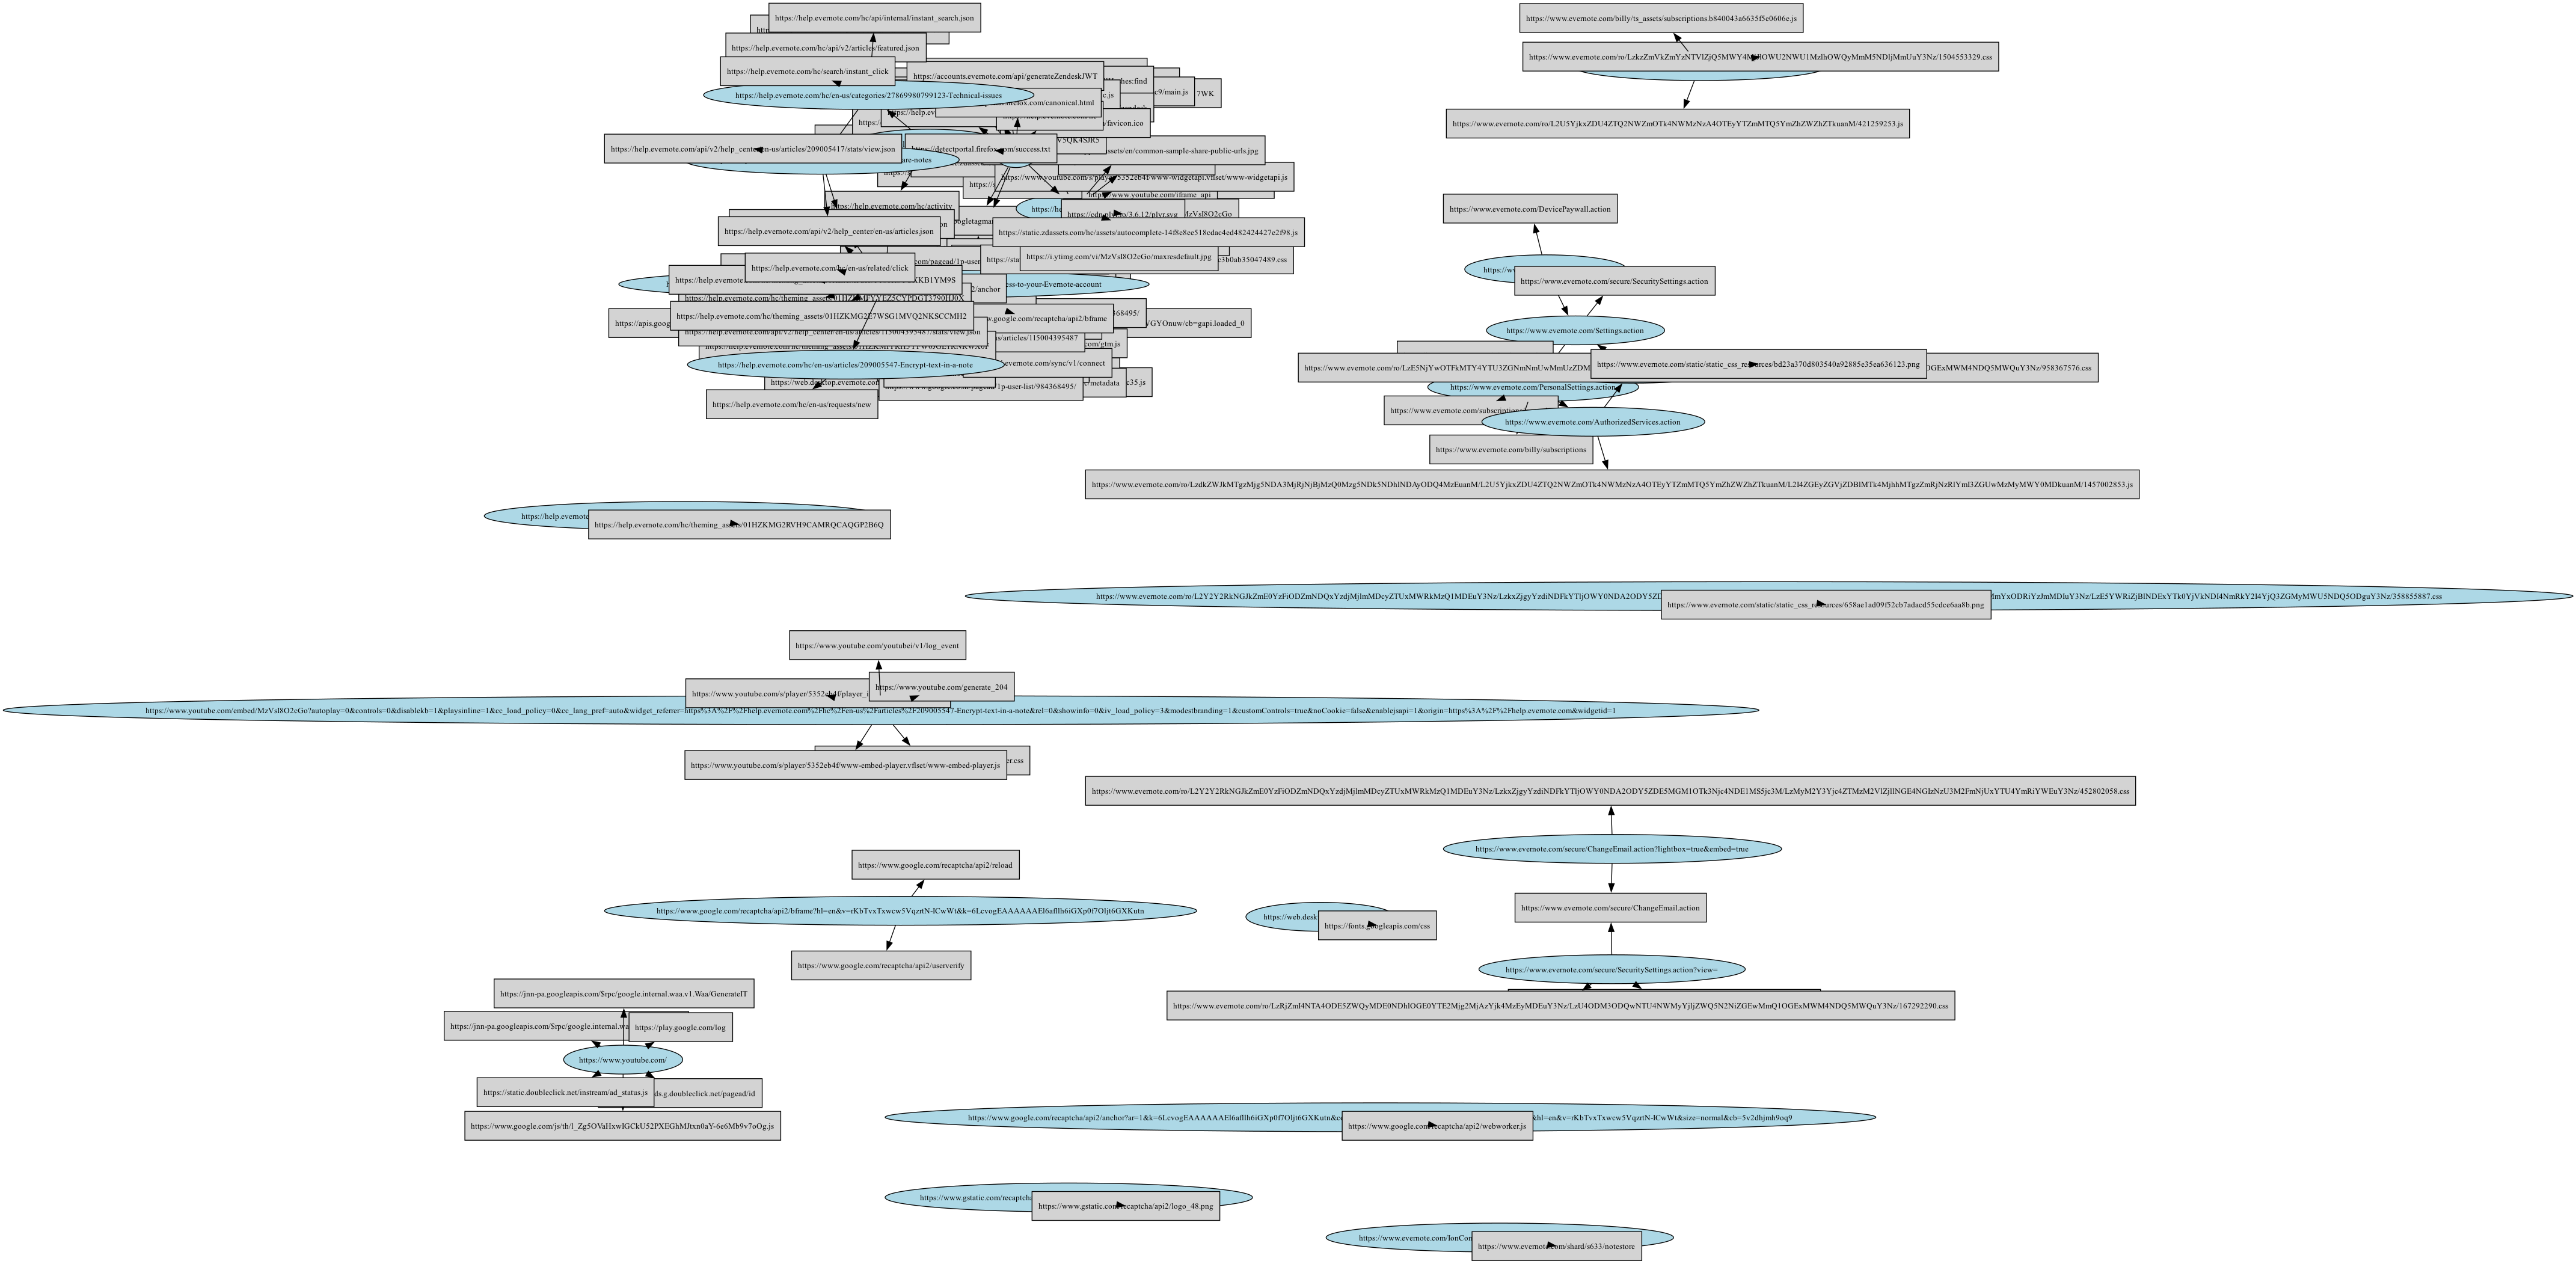

In [12]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True, strict=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=10)
        graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=10)
        graph.add_edge(row['Referer'], row['full_path'], penwidth=1)

    return graph

def render_graph(graph, filename, prog='neato', size=(800, 800)):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}"'.format(','.join(map(str, size))))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size
render_graph(graph, filename='neato_graph.png', prog='neato', size=(800, 800))


In [13]:
# import pygraphviz as pgv
# from IPython.display import Image

# def create_graph(df):
#     graph = pgv.AGraph(directed=True, strict=True)

#     # Add nodes and edges from DataFrame
#     for index, row in df.iterrows():
#         graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=10)
#         graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=10)
#         graph.add_edge(row['Referer'], row['full_path'], penwidth=1)

#     # Set graph attributes
#     graph.graph_attr['overlap'] = 'scale'  # Adjust overlap handling

#     return graph

# def render_graph(graph, filename, prog='neato', size=(800, 800)):
#     graph.layout(prog=prog)
#     graph.draw(filename, format='png', prog=prog, args='-Gsize="{}"'.format(','.join(map(str, size))))
#     return Image(filename=filename)

# # Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# # Create the graph
# graph = create_graph(df)

# # Render and display the graph with specified size
# render_graph(graph, filename='neato_graph.png', prog='neato', size=(800, 800))


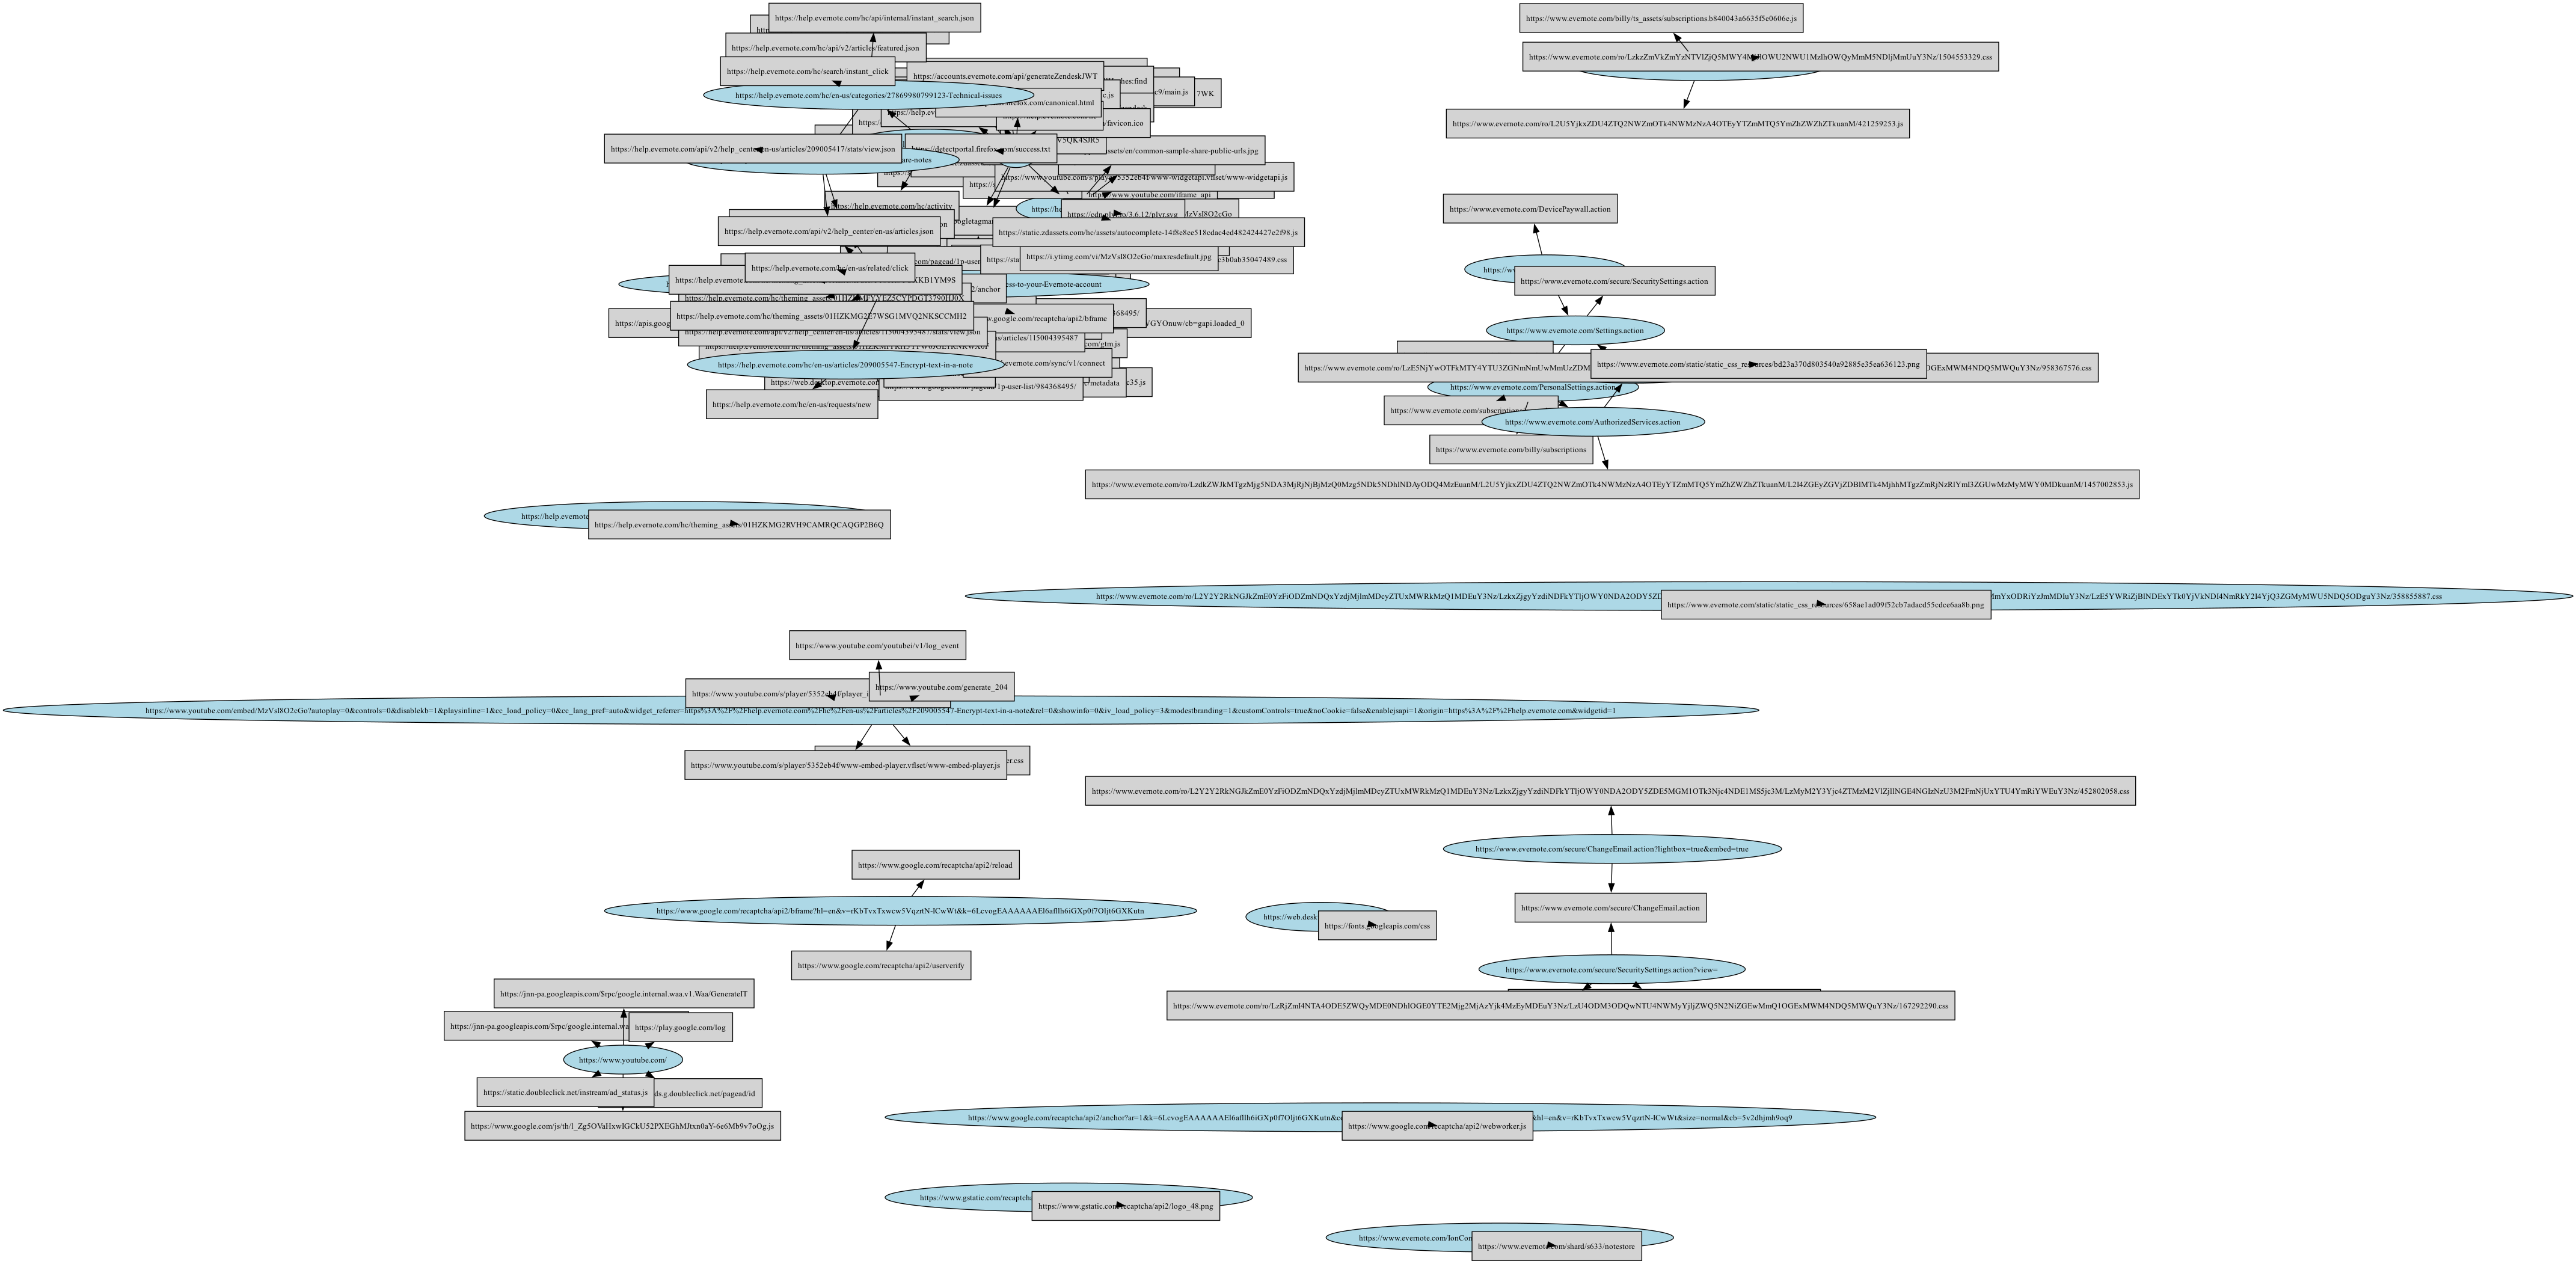

In [19]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True, strict=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=10)
        graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=10)
        graph.add_edge(row['Referer'], row['full_path'], penwidth=1, weight=1)  # Adjust weight for edge influence

    return graph

def render_graph(graph, filename, prog='neato', size=(800, 800)):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}"'.format(','.join(map(str, size))))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size
render_graph(graph, filename='non_overlapping_graph.png', prog='neato', size=(3000, 800))


/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.758302 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


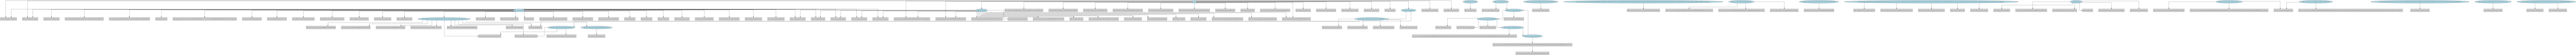

In [21]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True, strict=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=10)
        graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=10)
        graph.add_edge(row['Referer'], row['full_path'], penwidth=1)

    # Set graph attributes for layout
    graph.graph_attr['nodesep'] = 1.0
    graph.graph_attr['ranksep'] = 1.0
    graph.graph_attr['splines'] = 'ortho'
    graph.graph_attr['overlap'] = 'false'

    return graph

def render_graph(graph, filename, prog='dot', size=(1200, 800)):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}"'.format(','.join(map(str, size))))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size
render_graph(graph, filename='clear_non_overlapping_graph.png', prog='dot', size=(1200, 800))



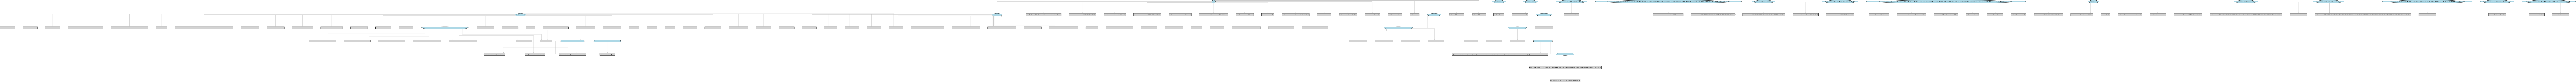

In [24]:
## GOOOD

import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True, strict=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=10)
        graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=10)
        graph.add_edge(row['Referer'], row['full_path'], penwidth=1, color='gray')

    # Set graph attributes for layout
    graph.graph_attr['nodesep'] = 1.5  # Adjust node separation
    graph.graph_attr['ranksep'] = 2.0  # Adjust rank (layer) separation
    graph.graph_attr['splines'] = 'ortho'  # Orthogonal edges
    graph.graph_attr['overlap'] = 'false'  # Prevent node overlap

    return graph

def render_graph(graph, filename, prog='dot', size=(16000, 9000)):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}"'.format(','.join(map(str, size))))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size
render_graph(graph, filename='clear_readble_graph.png', prog='dot', size=(16000, 9000))



In [26]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True, strict=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=14)
        graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=14)
        graph.add_edge(row['Referer'], row['full_path'], penwidth=1, color='gray')

    # Set graph attributes for layout
    graph.graph_attr['nodesep'] = 1.5  # Adjust node separation
    graph.graph_attr['ranksep'] = 2.0  # Adjust rank (layer) separation
    graph.graph_attr['splines'] = 'ortho'  # Orthogonal edges
    graph.graph_attr['overlap'] = 'false'  # Prevent node overlap

    return graph

def render_graph(graph, filename, prog='dot', size=(16000, 9000), dpi=300):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}" -Gdpi={}'.format(','.join(map(str, size)), dpi))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

# Render and display the graph with specified size and DPI
render_graph(graph, filename='clear_readable_graph.png', prog='dot', size=(16000, 9000), dpi=300)


/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0997634 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.017522 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


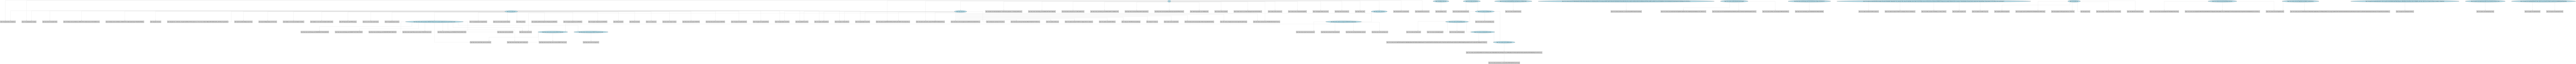

In [29]:
import pygraphviz as pgv
from IPython.display import Image

def create_graph(df):
    graph = pgv.AGraph(directed=True, strict=True)

    # Add nodes and edges from DataFrame
    for index, row in df.iterrows():
        graph.add_node(row['Referer'], shape='ellipse', style='filled', fillcolor='lightblue', fontsize=14)
        graph.add_node(row['full_path'], shape='box', style='filled', fillcolor='lightgrey', fontsize=14)
        graph.add_edge(row['Referer'], row['full_path'], penwidth=1, color='gray')

    # Set graph attributes for layout
    graph.graph_attr['nodesep'] = 1.5  # Adjust node separation
    graph.graph_attr['ranksep'] = 2.0  # Adjust rank (layer) separation
    graph.graph_attr['splines'] = 'ortho'  # Orthogonal edges
    graph.graph_attr['overlap'] = 'false'  # Prevent node overlap

    return graph

def render_graph(graph, filename, prog='dot', size=(16000, 9000), dpi=300):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args='-Gsize="{}" -Gdpi={}'.format(','.join(map(str, size)), dpi))
    return Image(filename=filename)

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
# Create the graph
graph = create_graph(df)

graph.draw('flowchart.png', prog='dot', args='-Gdpi=3000')

# Display the graph in the notebook
Image(filename='flowchart.png')

# Render and display the graph with specified size and DPI
# render_graph(graph, filename='clear_readable_graph.png', prog='dot', size=(16000, 9000), dpi=300)

In [30]:
import pygraphviz as pgv
import random
from IPython.display import Image

# Function to create a random graph with given number of nodes
def create_random_graph(num_nodes):
    graph = pgv.AGraph(directed=True, strict=True)

    # Generate random nodes
    nodes = [f'Node_{i}' for i in range(num_nodes)]

    # Add nodes to the graph
    for node in nodes:
        graph.add_node(node, shape='ellipse', style='filled', fillcolor='lightblue', fontsize=8)

    # Add random edges between nodes (adjust density as needed)
    edge_density = 0.1  # Adjust density to control number of edges
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_density:
                graph.add_edge(nodes[i], nodes[j])

    # Set graph attributes
    graph.graph_attr['splines'] = 'ortho'
    graph.graph_attr['ranksep'] = 1.5
    graph.graph_attr['nodesep'] = 1.0

    return graph

# Function to render and display the graph
def render_graph(graph, filename, prog='dot', size=(16000, 9000), dpi=300):
    graph.layout(prog=prog)
    graph.draw(filename, format='png', prog=prog, args=f'-Gsize="{size[0]},{size[1]}" -Gdpi={dpi}')
    return Image(filename=filename)

# Generate a random graph with 500 nodes
num_nodes = 500
graph = create_random_graph(num_nodes)

# Render and display the graph with specified size and DPI
render_graph(graph, filename='random_graph_500_nodes.png', prog='dot', size=(16000, 9000), dpi=300)


KeyboardInterrupt: 

In [31]:
import requests
import pandas as pd
import time

API_TOKEN = 'eyJtaXJvLm9yaWdpbiI6ImV1MDEifQ_uxjJtfs6yYlcL1XMLifDWVOSP2c'
BOARD_ID = 'uXjVK1N3F5U='
HEADERS = {
    'Authorization': f'Bearer {API_TOKEN}',
    'Content-Type': 'application/json'
}

# Function to create a shape (node) in Miro
def create_shape(board_id, text, x, y, shape_type='rectangle', color='#FFFFFF'):
    url = f'https://api.miro.com/v2/boards/{board_id}/widgets'
    payload = {
        "data": {
            "content": text
        },
        "style": {
            "shapeType": shape_type,
            "backgroundColor": color,
            "borderColor": "#000000",
            "fontSize": 10
        },
        "position": {
            "x": x,
            "y": y
        },
        "type": "shape"
    }
    response = requests.post(url, headers=HEADERS, json=payload)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error creating shape: {response.status_code}, {response.text}")
        return None

# Function to create a connector (edge) in Miro
def create_connector(board_id, start_widget_id, end_widget_id):
    url = f'https://api.miro.com/v2/boards/{board_id}/widgets'
    payload = {
        "type": "connector",
        "startWidgetId": start_widget_id,
        "endWidgetId": end_widget_id,
        "style": {
            "lineColor": "#000000",
            "lineStyle": "normal",
            "lineThickness": 1
        }
    }
    response = requests.post(url, headers=HEADERS, json=payload)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error creating connector: {response.status_code}, {response.text}")
        return None

# Create graph from DataFrame
def create_graph_in_miro(board_id, df):
    node_positions = {}
    x, y = 0, 0
    x_step, y_step = 200, 100

    for index, row in df.iterrows():
        referer = row['Referer']
        full_path = row['full_path']

        print('index:--', index)

        if referer not in node_positions:
            shape = create_shape(board_id, referer, x, y, shape_type='ellipse', color='lightblue')
            if shape and 'id' in shape:
                node_positions[referer] = (shape['id'], x, y)
            x += x_step

        if full_path not in node_positions:
            shape = create_shape(board_id, full_path, x, y, shape_type='rectangle', color='lightgrey')
            if shape and 'id' in shape:
                node_positions[full_path] = (shape['id'], x, y)
            y += y_step

        if referer in node_positions and full_path in node_positions:
            create_connector(board_id, node_positions[referer][0], node_positions[full_path][0])

        time.sleep(0.2)  # To avoid rate limits

# Assuming df is your DataFrame containing 'Referer' and 'full_path' columns
df = pd.DataFrame({
    'Referer': ['A', 'A', 'B', 'C'],
    'full_path': ['B', 'C', 'D', 'E']
})

# Create the graph in Miro
create_graph_in_miro(BOARD_ID, df)
##

/Users/jaykhandelwal/Documents/Development/Projects/recon-tools/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


index:-- 0
Error creating shape: 405, {
  "status" : 405,
  "code" : "methodNotSupported",
  "message" : "Request method 'POST' not supported for this endpoint",
  "type" : "error"
}
Error creating shape: 405, {
  "status" : 405,
  "code" : "methodNotSupported",
  "message" : "Request method 'POST' not supported for this endpoint",
  "type" : "error"
}
index:-- 1
Error creating shape: 405, {
  "status" : 405,
  "code" : "methodNotSupported",
  "message" : "Request method 'POST' not supported for this endpoint",
  "type" : "error"
}
Error creating shape: 405, {
  "status" : 405,
  "code" : "methodNotSupported",
  "message" : "Request method 'POST' not supported for this endpoint",
  "type" : "error"
}
index:-- 2
Error creating shape: 405, {
  "status" : 405,
  "code" : "methodNotSupported",
  "message" : "Request method 'POST' not supported for this endpoint",
  "type" : "error"
}
Error creating shape: 405, {
  "status" : 405,
  "code" : "methodNotSupported",
  "message" : "Request meth

KeyboardInterrupt: 

In [36]:
## Working |  creating shapes in miro, but not doing required things

import requests
import pandas as pd
import random

# Miro API token and board ID

HEADERS = {
    'Authorization': f'Bearer {API_TOKEN}',
    'Content-Type': 'application/json'
}

# Function to create a batch of shapes (nodes) in Miro
def create_shapes(board_id, nodes):
    url = f'https://api.miro.com/v2/boards/{board_id}/shapes'
    responses = []
    for node in nodes:
        payload = {
            "data": {
                "content": node['content'],
                "shape": node['shape']
            },
            "style": {
                "borderColor": node['borderColor'],
                "borderOpacity": "1.0",
                "borderStyle": "normal",
                "borderWidth": "1",
                "color": "#1a1a1a",
                "fillColor": node['fillColor'],
                "fillOpacity": "1.0",
                "fontFamily": "arial",
                "fontSize": "10",
                "textAlign": "center",
                "textAlignVertical": "middle"
            },
            "position": {
                "x": node['x'],
                "y": node['y']
            },
            "geometry": {
                "height": 60,
                "rotation": 0,
                "width": 100
            }
        }
        response = requests.post(url, headers=HEADERS, json=payload)
        if response.status_code == 200:
            responses.append(response.json())
        else:
            print(f"Error creating shape: {response.status_code}, {response.text}")
    return responses

# Function to create a batch of connectors (edges) in Miro
def create_connectors(board_id, connectors):
    url = f'https://api.miro.com/v2/boards/{board_id}/connectors'
    for connector in connectors:
        payload = {
            "startItem": {
                "id": connector['start_id'],
                "position": {"x": "50%", "y": "0%"},
                "snapTo": "auto"
            },
            "endItem": {
                "id": connector['end_id'],
                "position": {"x": "50%", "y": "0%"},
                "snapTo": "auto"
            },
            "shape": "straight",
            "style": {
                "color": "#9510ac",
                "endStrokeCap": "none",
                "fontSize": "15",
                "startStrokeCap": "none",
                "strokeColor": "#2d9bf0",
                "strokeStyle": "normal",
                "strokeWidth": "2.0",
                "textOrientation": "horizontal"
            }
        }
        response = requests.post(url, headers=HEADERS, json=payload)
        if response.status_code != 200:
            print(f"Error creating connector: {response.status_code}, {response.text}")
    return "Connectors created successfully"

# Create graph from DataFrame
def create_graph_in_miro(board_id, df):
    nodes = {}
    shapes_payload = []
    connectors_payload = []
    x, y = 0, 0
    x_step, y_step = 200, 100

    for index, row in df.iterrows():
        referer = row['Referer']
        full_path = row['full_path']

        if referer not in nodes:
            node = {
                'content': referer,
                'shape': 'triangle',
                'borderColor': '#000000',
                'fillColor': '#000000',
                'x': x,
                'y': y
            }
            nodes[referer] = len(shapes_payload)
            shapes_payload.append(node)
            x += x_step

        if full_path not in nodes:
            node = {
                'content': full_path,
                'shape': 'rectangle',
                'borderColor': '#000000',
                'fillColor': '#000000',
                'x': x,
                'y': y
            }
            nodes[full_path] = len(shapes_payload)
            shapes_payload.append(node)
            y += y_step

    shapes_response = create_shapes(board_id, shapes_payload)
    if shapes_response:
        widget_ids = [widget['id'] for widget in shapes_response]
        for referer, full_path in zip(df['Referer'], df['full_path']):
            start_widget_id = widget_ids[nodes[referer]]
            end_widget_id = widget_ids[nodes[full_path]]
            connector = {
                'start_id': start_widget_id,
                'end_id': end_widget_id
            }
            connectors_payload.append(connector)

        create_connectors(board_id, connectors_payload)

# Generate a random DataFrame with 500-1000 nodes
num_nodes = 20  # Adjust as needed for 500-1000 nodes
data = {
    'Referer': [f'Node_{i}' for i in range(num_nodes)],
    'full_path': [f'Node_{i+1}' for i in range(num_nodes)]
}
df = pd.DataFrame(data)

# Create the graph in Miro
create_graph_in_miro(BOARD_ID, df)


Error creating shape: 201, {
  "id" : "3458764594013996663",
  "type" : "shape",
  "data" : {
    "content" : "Node_0",
    "shape" : "triangle"
  },
  "style" : {
    "fillColor" : "#000000",
    "fillOpacity" : "1.0",
    "fontFamily" : "arial",
    "fontSize" : "10",
    "borderColor" : "#000000",
    "borderWidth" : "1.0",
    "borderOpacity" : "1.0",
    "borderStyle" : "normal",
    "textAlign" : "center",
    "textAlignVertical" : "middle",
    "color" : "#1a1a1a"
  },
  "geometry" : {
    "width" : 100.0,
    "height" : 60.0
  },
  "position" : {
    "x" : 0.0,
    "y" : 0.0,
    "origin" : "center",
    "relativeTo" : "canvas_center"
  },
  "links" : {
    "self" : "https://api.miro.com/v2/boards/uXjVK1N3F5U%3D/shapes/3458764594013996663"
  },
  "createdAt" : "2024-07-05T12:33:38Z",
  "createdBy" : {
    "id" : "3458764594003817768",
    "type" : "user"
  },
  "modifiedAt" : "2024-07-05T12:33:38Z",
  "modifiedBy" : {
    "id" : "3458764594003817768",
    "type" : "user"
  }
}


KeyboardInterrupt: 

In [39]:
API_TOKEN = 'eyJtaXJvLm9yaWdpbiI6ImV1MDEifQ_uxjJtfs6yYlcL1XMLifDWVOSP2c'
BOARD_ID = 'uXjVK1N3F5U='

In [41]:
import requests
import pandas as pd

HEADERS = {
    'Authorization': f'Bearer {API_TOKEN}',
    'Content-Type': 'application/json'
}

# Function to create a batch of shapes (nodes) in Miro
def create_shapes(board_id, nodes):
    url = f'https://api.miro.com/v2/boards/{board_id}/shapes'
    responses = []
    print(f"Creating {len(nodes)} shapes...")
    for idx, node in enumerate(nodes):
        payload = {
            "data": {
                "content": node['content'],
                "shape": node['shape']
            },
            "style": {
                "borderColor": node['borderColor'],
                "borderOpacity": "1.0",
                "borderStyle": "normal",
                "borderWidth": "1",
                "color": "#1a1a1a",
                "fillColor": node['fillColor'],
                "fillOpacity": "1.0",
                "fontFamily": "arial",
                "fontSize": "10",
                "textAlign": "center",
                "textAlignVertical": "middle"
            },
            "position": {
                "x": node['x'],
                "y": node['y']
            },
            "geometry": {
                "height": 60,
                "rotation": 0,
                "width": 100
            }
        }
        response = requests.post(url, headers=HEADERS, json=payload)
        if response.status_code == 200:
            responses.append(response.json())
            print(f"Shape {idx+1}/{len(nodes)} created successfully: {node['content']}")
        else:
            print(f"Error creating shape {idx+1}/{len(nodes)}: {response.status_code}, {response.text}")
    return responses

# Function to create a batch of connectors (edges) in Miro
def create_connectors(board_id, connectors):
    url = f'https://api.miro.com/v2/boards/{board_id}/connectors'
    print(f"Creating {len(connectors)} connectors...")
    for idx, connector in enumerate(connectors):
        payload = {
            "startItem": {
                "id": connector['start_id'],
                "position": {"x": "50%", "y": "0%"},
                "snapTo": "auto"
            },
            "endItem": {
                "id": connector['end_id'],
                "position": {"x": "50%", "y": "0%"},
                "snapTo": "auto"
            },
            "shape": "straight",
            "style": {
                "color": "#9510ac",
                "endStrokeCap": "none",
                "fontSize": "15",
                "startStrokeCap": "none",
                "strokeColor": "#2d9bf0",
                "strokeStyle": "normal",
                "strokeWidth": "2.0",
                "textOrientation": "horizontal"
            }
        }
        response = requests.post(url, headers=HEADERS, json=payload)
        if response.status_code == 200:
            print(f"Connector {idx+1}/{len(connectors)} created successfully")
        else:
            print(f"Error creating connector {idx+1}/{len(connectors)}: {response.status_code}, {response.text}")
    return "Connectors created successfully"

# Create graph from DataFrame
def create_graph_in_miro(board_id, df):
    nodes = {}
    shapes_payload = []
    connectors_payload = []
    x, y = 0, 0
    x_step, y_step = 200, 100

    print("Preparing shapes and connectors...")
    for index, row in df.iterrows():
        referer = row['Referer']
        full_path = row['full_path']

        if referer not in nodes:
            node = {
                'content': referer,
                'shape': 'trapezoid',
                'borderColor': '#000000',
                'fillColor': '#ADD8E6',
                'x': x,
                'y': y
            }
            nodes[referer] = len(shapes_payload)
            shapes_payload.append(node)
            x += x_step

        if full_path not in nodes:
            node = {
                'content': full_path,
                'shape': 'rectangle',
                'borderColor': '#000000',
                'fillColor': '#ADD8E6',
                'x': x,
                'y': y
            }
            nodes[full_path] = len(shapes_payload)
            shapes_payload.append(node)
            y += y_step

    print("Shapes and connectors prepared.")
    shapes_response = create_shapes(board_id, shapes_payload)
    if shapes_response:
        widget_ids = [widget['id'] for widget in shapes_response]
        for referer, full_path in zip(df['Referer'], df['full_path']):
            start_widget_id = widget_ids[nodes[referer]]
            end_widget_id = widget_ids[nodes[full_path]]
            connector = {
                'start_id': start_widget_id,
                'end_id': end_widget_id
            }
            connectors_payload.append(connector)

        create_connectors(board_id, connectors_payload)

# Generate a random DataFrame with 500 nodes for demonstration
num_nodes = 10  # Adjust as needed for 500-1000 nodes
data = {
    'Referer': [f'Node_{i}' for i in range(num_nodes)],
    'full_path': [f'Node_{i+1}' for i in range(num_nodes-1)] + ['Node_0']  # Ensure it's within the range
}
df = pd.DataFrame(data)

# Create the graph in Miro
create_graph_in_miro(BOARD_ID, df)


Preparing shapes and connectors...
Shapes and connectors prepared.
Creating 10 shapes...
Error creating shape 1/10: 201, {
  "id" : "3458764594014312355",
  "type" : "shape",
  "data" : {
    "content" : "Node_0",
    "shape" : "trapezoid"
  },
  "style" : {
    "fillColor" : "#add8e6",
    "fillOpacity" : "1.0",
    "fontFamily" : "arial",
    "fontSize" : "10",
    "borderColor" : "#000000",
    "borderWidth" : "1.0",
    "borderOpacity" : "1.0",
    "borderStyle" : "normal",
    "textAlign" : "center",
    "textAlignVertical" : "middle",
    "color" : "#1a1a1a"
  },
  "geometry" : {
    "width" : 100.0,
    "height" : 60.0
  },
  "position" : {
    "x" : 0.0,
    "y" : 0.0,
    "origin" : "center",
    "relativeTo" : "canvas_center"
  },
  "links" : {
    "self" : "https://api.miro.com/v2/boards/uXjVK1N3F5U%3D/shapes/3458764594014312355"
  },
  "createdAt" : "2024-07-05T12:37:47Z",
  "createdBy" : {
    "id" : "3458764594003817768",
    "type" : "user"
  },
  "modifiedAt" : "2024-07

In [44]:
## Basic | Very nice and working


import requests
import pandas as pd

HEADERS = {
    'Authorization': f'Bearer {API_TOKEN}',
    'Content-Type': 'application/json'
}

# Function to create a batch of shapes (nodes) in Miro
def create_shapes(board_id, nodes):
    url = f'https://api.miro.com/v2/boards/{board_id}/shapes'
    responses = []
    print(f"Creating {len(nodes)} shapes...")
    for idx, node in enumerate(nodes):
        payload = {
            "data": {
                "content": node['content'],
                "shape": node['shape']
            },
            "style": {
                "borderColor": node['borderColor'],
                "borderOpacity": "1.0",
                "borderStyle": "normal",
                "borderWidth": "1",
                "color": "#1a1a1a",
                "fillColor": node['fillColor'],
                "fillOpacity": "1.0",
                "fontFamily": "arial",
                "fontSize": "10",
                "textAlign": "center",
                "textAlignVertical": "middle"
            },
            "position": {
                "x": node['x'],
                "y": node['y']
            },
            "geometry": {
                "height": 60,
                "rotation": 0,
                "width": 100
            }
        }
        response = requests.post(url, headers=HEADERS, json=payload)
        if response.status_code == 201:
            responses.append(response.json())
            print(f"Shape {idx+1}/{len(nodes)} created successfully: {node['content']}")
        else:
            print(f"Error creating shape {idx+1}/{len(nodes)}: {response.status_code}, {response.text}")
    return responses

# Function to create a batch of connectors (edges) in Miro
def create_connectors(board_id, connectors):
    url = f'https://api.miro.com/v2/boards/{board_id}/connectors'
    print(f"Creating {len(connectors)} connectors...")
    for idx, connector in enumerate(connectors):
        payload = {
            "startItem": {
                "id": connector['start_id'],
                # "position": {"x": "50%", "y": "0%"},
                "snapTo": "auto"
            },
            "endItem": {
                "id": connector['end_id'],
                # "position": {"x": "50%", "y": "0%"},
                "snapTo": "auto"
            },
            "shape": "straight",
            "style": {
                "color": "#9510ac",
                "endStrokeCap": "none",
                "fontSize": "15",
                "startStrokeCap": "none",
                "strokeColor": "#2d9bf0",
                "strokeStyle": "normal",
                "strokeWidth": "2.0",
                "textOrientation": "horizontal"
            }
        }
        response = requests.post(url, headers=HEADERS, json=payload)
        if response.status_code == 200:
            print(f"Connector {idx+1}/{len(connectors)} created successfully")
        else:
            print(f"Error creating connector {idx+1}/{len(connectors)}: {response.status_code}, {response.text}")
    return "Connectors created successfully"

# Create graph from DataFrame
def create_graph_in_miro(board_id, df):
    nodes = {}
    shapes_payload = []
    connectors_payload = []
    x, y = 0, 0
    x_step, y_step = 200, 100

    print("Preparing shapes and connectors...")
    for index, row in df.iterrows():
        referer = row['Referer']
        full_path = row['full_path']

        if referer not in nodes:
            node = {
                'content': referer,
                'shape': 'trapezoid',
                'borderColor': '#000000',
                'fillColor': '#ADD8E6',
                'x': x,
                'y': y
            }
            nodes[referer] = len(shapes_payload)
            shapes_payload.append(node)
            x += x_step

        if full_path not in nodes:
            node = {
                'content': full_path,
                'shape': 'rectangle',
                'borderColor': '#000000',
                'fillColor': '#ADD8E6',
                'x': x,
                'y': y
            }
            nodes[full_path] = len(shapes_payload)
            shapes_payload.append(node)
            y += y_step

    print("Shapes and connectors prepared.")
    shapes_response = create_shapes(board_id, shapes_payload)

    print("Shape created successfully.")

    if shapes_response:
        print("starting for connector.")
        widget_ids = [widget['id'] for widget in shapes_response]
        for referer, full_path in zip(df['Referer'], df['full_path']):
            start_widget_id = widget_ids[nodes[referer]]
            end_widget_id = widget_ids[nodes[full_path]]
            connector = {
                'start_id': start_widget_id,
                'end_id': end_widget_id
            }
            connectors_payload.append(connector)
        print("connectors_payload len:-", len(connectors_payload))
        create_connectors(board_id, connectors_payload)

# Generate a random DataFrame with 500 nodes for demonstration
num_nodes = 10  # Adjust as needed for 500-1000 nodes
data = {
    'Referer': [f'Node_{i}' for i in range(num_nodes)],
    'full_path': [f'Node_{i+1}' for i in range(num_nodes-1)] + ['Node_0']  # Ensure it's within the range
}
df = pd.DataFrame(data)

# Create the graph in Miro
create_graph_in_miro(BOARD_ID, df)


Preparing shapes and connectors...
Shapes and connectors prepared.
Creating 10 shapes...
Shape 1/10 created successfully: Node_0
Shape 2/10 created successfully: Node_1
Shape 3/10 created successfully: Node_2
Shape 4/10 created successfully: Node_3
Shape 5/10 created successfully: Node_4
Shape 6/10 created successfully: Node_5
Shape 7/10 created successfully: Node_6
Shape 8/10 created successfully: Node_7
Shape 9/10 created successfully: Node_8
Shape 10/10 created successfully: Node_9
Shape created successfully.
starting for connector.
connectors_payload len:- 10
Creating 10 connectors...
Connector 1/10 created successfully
Connector 2/10 created successfully
Connector 3/10 created successfully
Connector 4/10 created successfully
Connector 5/10 created successfully
Connector 6/10 created successfully
Connector 7/10 created successfully
Connector 8/10 created successfully
Connector 9/10 created successfully
Connector 10/10 created successfully


In [45]:
df

Referer full_path
0  Node_0    Node_1
1  Node_1    Node_2
2  Node_2    Node_3
3  Node_3    Node_4
4  Node_4    Node_5
5  Node_5    Node_6
6  Node_6    Node_7
7  Node_7    Node_8
8  Node_8    Node_9
9  Node_9    Node_0